# 📘 Introdução à Análise Descritiva de Dados (Parte 1)

Este roteiro é voltado para a compreensão inicial de como analisar dados de energia elétrica, com exemplos utilizando dados do Smart Campus UFCG.
---

## 🔌 1. Coleta e Armazenamento de Dados

O primeiro passo da análise de dados é entender **de onde os dados vêm** e **como são organizados**.

🧾 Neste curso, usaremos dados reais extraídos de sensores do campus, armazenados em planilhas. Nesse contexto, é necessário salientar que os dados utilizados nos exemplos são filtrados da planilha, ou seja, todos os gráficos vistos durante este roteiro são resultados da filtragem dos dados brutos de energia, advindos do Smart Campus UFCG.

📌 Os dados que vamos utilizar estão organizados da seguinte forma:

- **Data e Hora**
- **Consumo de Energia (kWh)**
- **Tensão (V)**
- **Corrente (A)**
- **Local do Medidor**

💻 Iremos usar os tópicos acima para dar exemplos e demonstrar de forma mais visual como compreender os conceitos apresentados.



---

## 🧩 2. Tipos de Variáveis

Vamos entender os **tipos de variáveis** presentes no nosso conjunto de dados.

- **Qualitativas Nominais**: categorizam sem ordem (ex: Local do Medidor, cor de olhos, estado civil, sexo)



Melhor indicação de uso: para classificar ou identificar grupos e útil em gráfico de barras ou tabelas de frequência

No exemplo abaixo dá para ver um gráfico de barras com a classificação de variável qualitativa nominal apenas pela descrição dos nomes dos Medidores.


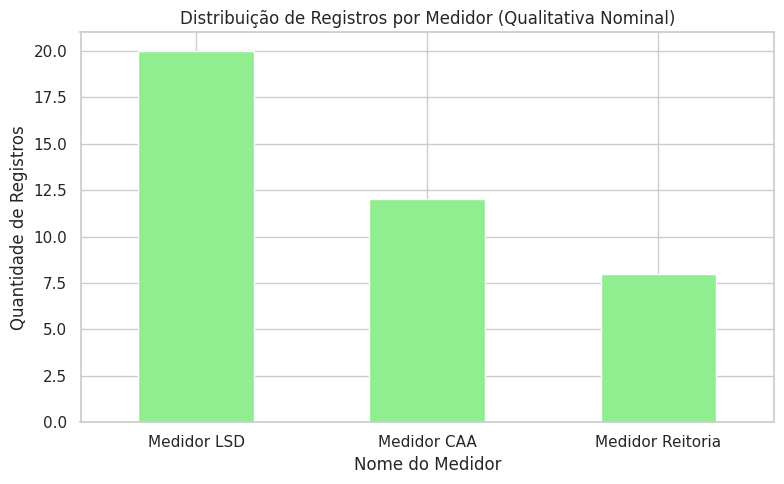

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dados simulados
medidores = ['Medidor LSD'] * 20 + ['Medidor CAA'] * 12 + ['Medidor Reitoria'] * 8
df = pd.DataFrame({'Nome': medidores})

# Gráfico com rótulo rotacionado
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
df['Nome'].value_counts().plot(kind='bar', color='lightgreen', rot =0)
plt.title('Distribuição de Registros por Medidor (Qualitativa Nominal)')
plt.xlabel('Nome do Medidor')
plt.ylabel('Quantidade de Registros')
plt.tight_layout()
plt.show()



- **Qualitativas Ordinais**: categorizam com ordem ou grau(ex: Nível de Tensão: "Alta", "Média", "Baixa", grau de satisfação: bom, regular, ótimo)

Melhores indicações de uso: quando é importante comparar posições ou níveis. Também é muito utilizada em escalas de avaliação e rankeamento.
No exemplo abaixo podemos ver um gráfico parecido com o qualitativo nominal, porém, na sua classificação existe uma ordenação, ou melhor, existe um grau de satisfação entre as declarações das colunas.

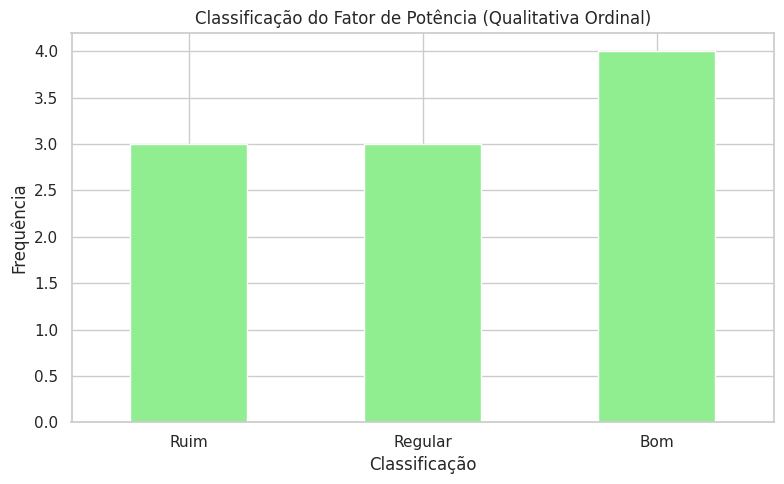

In [19]:
# Fatores de potência simulados
fp_valores = [0.88, 0.91, 0.94, 0.96, 0.98, 0.87, 0.89, 0.93, 0.95, 0.97]

# Classificar
def classificar_fp(fp):
    if fp < 0.90:
        return "Ruim"
    elif fp < 0.95:
        return "Regular"
    else:
        return "Bom"

df_fp = pd.DataFrame({'FP': fp_valores})
df_fp['Classificação'] = df_fp['FP'].apply(classificar_fp)

# Gráfico
ordem = ['Ruim', 'Regular', 'Bom']
plt.figure(figsize=(8, 5))
df_fp['Classificação'].value_counts().reindex(ordem).plot(kind='bar', color='lightgreen', rot = 0)
plt.title('Classificação do Fator de Potência (Qualitativa Ordinal)')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


- **Quantitativas Discretas**: números contáveis e inteiros (ex: quantidade de eventos, número de filhos, número de atendimentos)

Usos mais comuns: quando o dado representa contagens, sendo muito comum em dados administrativos. Além disso, os gráficos mais indicados para esse tipo de dado são gráficos de colunas.
No gráfico abaixo é simples de identificar a comparação entre qual hora do dia obteve a maior quantidade de registros.

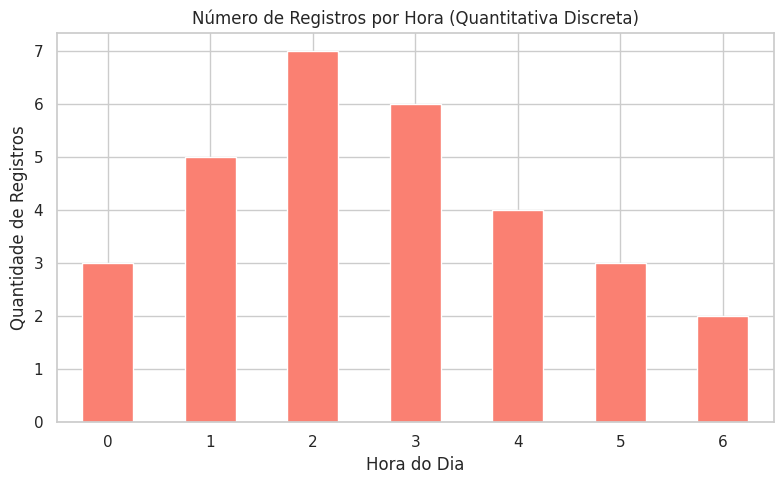

In [14]:
# Dados fictícios para os  horários de leitura
horas = [0]*3 + [1]*5 + [2]*7 + [3]*6 + [4]*4 + [5]*3 + [6]*2
df_horas = pd.DataFrame({'Hora': horas})

# Gráfico
plt.figure(figsize=(8, 5))
df_horas['Hora'].value_counts().sort_index().plot(kind='bar', color='salmon', rot = 0)
plt.title('Número de Registros por Hora (Quantitativa Discreta)')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- **Quantitativas Contínuas**: valores em uma escala contínua, ou seja, valores medidos que podem assumir qualquer valor dentro de um intervalo (ex: consumo em kWh, peso, altura, temperatura)

Uso mais comum: em análises estatísticas detalhadas como média e desvio padrão, em gráficos como histograma e distribuições.
No gráfico abaixo temos a junção de um histograma (barras verticais que mostram a frequência do consumo) e uma distribuição de densidade (linha suave sobre o histograma). Com isso, a história do gráfico é a estimativa contínua da densidade de probabilidade dos dados, dessa forma a linha indica onde os dados estão mais concentrados.

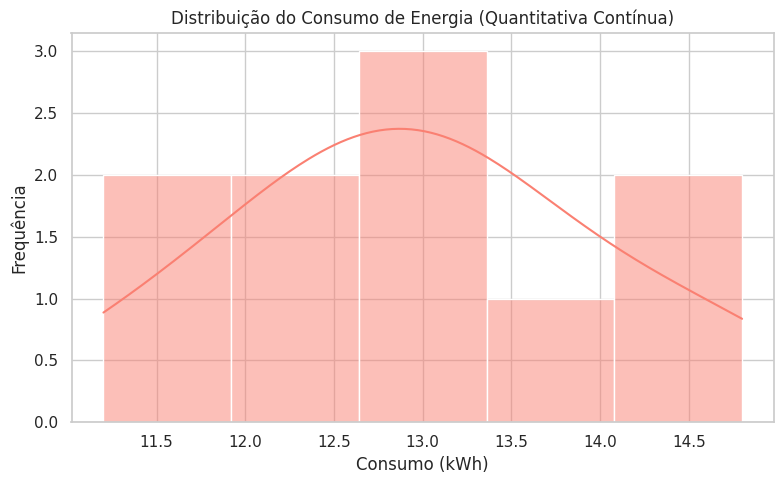

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo simples: consumo de energia em kWh
consumo = [12.3, 13.5, 11.2, 14.8, 12.9, 13.3, 11.9, 14.2, 13.0, 12.5]
df = pd.DataFrame({'Consumo (kWh)': consumo})

# Gráfico
plt.figure(figsize=(8, 5))
sns.histplot(df['Consumo (kWh)'], bins=5, kde=True, color='salmon')
plt.title('Distribuição do Consumo de Energia (Quantitativa Contínua)')
plt.xlabel('Consumo (kWh)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


## 🔍 3. Classificando as variáveis de Energia

identificando as variáveis do nosso dataset:

| Coluna             | Tipo de Variável                  |
|--------------------|-----------------------------------|
| Data e Hora        | Temporal                          |
| Local do Medidor   | Qualitativa Nominal               |
| Tensão (V)         | Quantitativa Contínua             |
| Corrente (A)       | Quantitativa Contínua             |
| Consumo (kWh)      | Quantitativa Contínua             |

## 💻✅ A seguir temos algumas aplicações importantes dentro da analise descritivas de dados que utilizam os tipos de variáveis apresentadas anteriormente.

## 🎯 4. Distribuição de Frequências

(Relaciona-se diretamente com variáveis quantitativas)

A Distribuição de Frequências é uma forma de organizar dados quantitativos em classes ou intervalos, contando quantas ocorrências existem em cada classe. Isso ajuda a visualizar como os dados estão distribuídos e identificar padrões.

No caso do nosso dataset, podemos observar a distribuição do Consumo de Energia (kWh) em faixas.

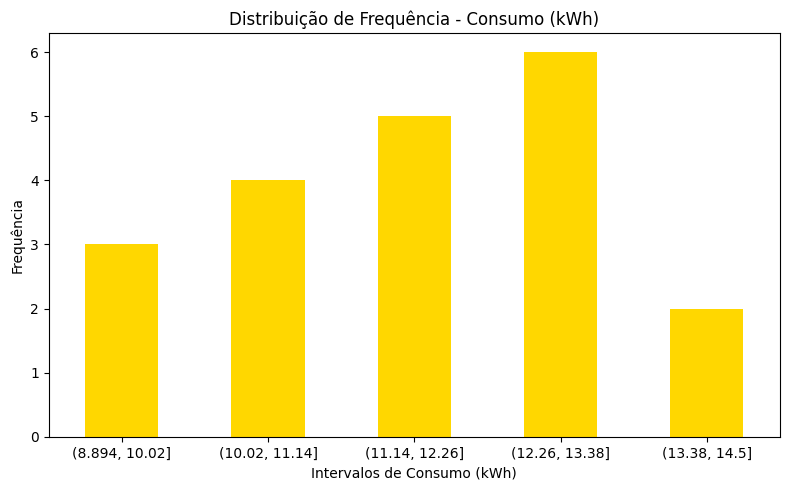

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados retirados da planilha
consumo = [9.5, 10.2, 11.7, 12.0, 13.1, 10.8, 11.4, 12.3, 13.0, 14.5,
           8.9, 10.5, 11.9, 12.7, 13.3, 14.0, 9.8, 10.4, 11.5, 12.9]

df = pd.DataFrame({'Consumo (kWh)': consumo})

# Distribuição de Frequências
consumo_freq = pd.cut(df['Consumo (kWh)'], bins=5).value_counts().sort_index()

# Gráfico
plt.figure(figsize=(8,5))
consumo_freq.plot(kind='bar', color='gold', rot = 0)
plt.title('Distribuição de Frequência - Consumo (kWh)')
plt.xlabel('Intervalos de Consumo (kWh)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


##🧮 5. Gráficos para séries temporais

Relaciona-se exclusivamente com variáveis quantitativas associadas ao tempo (temporal).

Gráficos de Séries Temporais ajudam a visualizar o comportamento de uma variável ao longo do tempo.

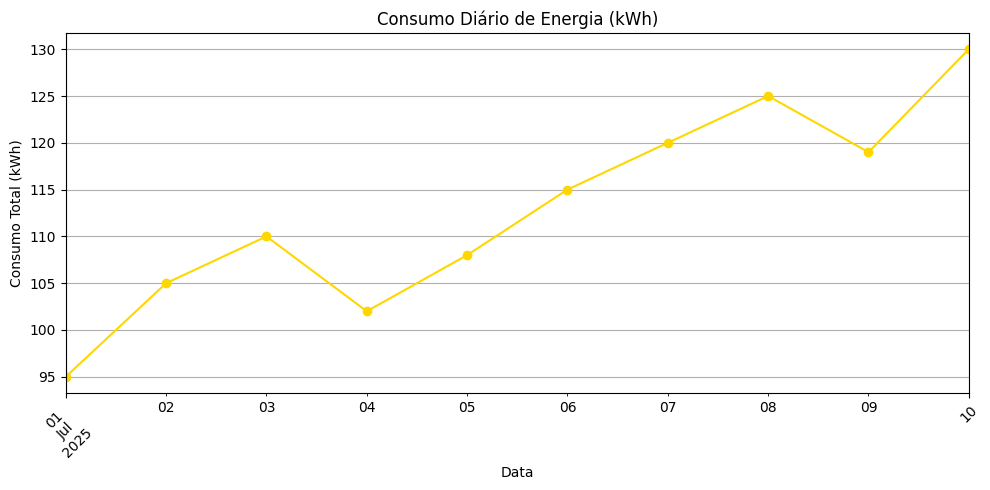

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados de datas e consumo
datas = ['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-05',
         '2025-07-06', '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10']
consumo_diario = [95, 105, 110, 102, 108, 115, 120, 125, 119, 130]  # Valores em kWh

df_tempo = pd.DataFrame({'Data': pd.to_datetime(datas), 'Consumo Diário (kWh)': consumo_diario})
df_tempo.set_index('Data', inplace=True)

# Gráfico de Linha
plt.figure(figsize=(10,5))
df_tempo['Consumo Diário (kWh)'].plot(kind='line', color='gold', marker='o')
plt.title('Consumo Diário de Energia (kWh)')
plt.xlabel('Data')
plt.ylabel('Consumo Total (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



##📊 6. Diagrama de dispersão

O Diagrama de Dispersão permite explorar a relação entre duas variáveis quantitativas.

Pontos dispersos no plano: Cada ponto representa a combinação de uma medição de corrente e o consumo correspondente.

Tendência visual: Se a maioria dos pontos sobe da esquerda para a direita, significa que existe uma relação positiva: conforme a corrente aumenta, o consumo de energia também tende a aumentar.

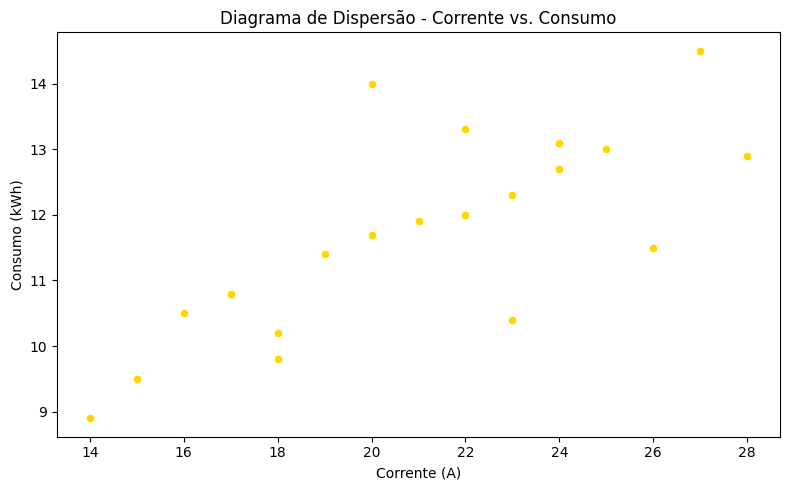

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados simulados
corrente = [15, 18, 20, 22, 24, 17, 19, 23, 25, 27,
            14, 16, 21, 24, 22, 20, 18, 23, 26, 28]  # em Ampères
consumo = [9.5, 10.2, 11.7, 12.0, 13.1, 10.8, 11.4, 12.3, 13.0, 14.5,
           8.9, 10.5, 11.9, 12.7, 13.3, 14.0, 9.8, 10.4, 11.5, 12.9]

df_disp = pd.DataFrame({'Corrente (A)': corrente, 'Consumo (kWh)': consumo})

# Diagrama de Dispersão
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_disp, x='Corrente (A)', y='Consumo (kWh)', color='#FFD700')
plt.title('Diagrama de Dispersão - Corrente vs. Consumo')
plt.xlabel('Corrente (A)')
plt.ylabel('Consumo (kWh)')
plt.tight_layout()
plt.show()


##🙏🏼😁🛜⚙️ HORA DO DESAFIO

Acesse o desafio 3 anexado nesse collab. É super importante a prática para explorar os conceitos aprendidos durante esse estudo.

Desafio aqui.